# S05 T01: Tasca mètodes de mostreig

### Antecedents:

#### No havia caigut que al exportar en html, que arrosega tot els DataFrame. He afegit a totes les visualitzacions el head() perque nomes ensenyi els primers valors.

## Descripció

#### Aprèn a realitzar mostreig de les dades amb Python

### Nivell 1

### Exercici 1

#### Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

#### Instalem llibreria SMOTE

In [3]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


#### Importem llibreria

In [1]:
from imblearn import under_sampling, over_sampling

#### Importem llibreries

In [2]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from geolite2 import geolite2
from scipy.stats import skew

warnings.filterwarnings('ignore')

#### He agafat un DataSet de una base de dades que tinc. No hi han dades personals ni confidencials. Les dades que conté son manteniments d'elements de Protecció Contra Incendis

In [3]:
man=pd.read_excel('dataframeman.xls', index_col=0)
man.drop('emp', inplace=True, axis=1)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


#### Visualitzem els promers registres per revisar que tinguem contingut al DataFrame

In [4]:
man.head()

,fe_al_det,id_cli2,id_serv2,serv,fe_al_man,id_man2,perivis,mes,dir,pob,pro,cp,pai,id_vehi2,bastidor,ubi,any,tipo,marca
id_mandet,,,,,,,,,,,,,,,,,,,
8498,2018-05-09 08:59:11.717000000,24133,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:11.590000000,1,1800,9,RIAL PASCUAL 23,ARENYS DE MUNT,BARCELONA,NaN,ESPAÑA,1.0,NaN,taller,0.0,Extintores Polvo ABC 6Kg,EXFAEX
8499,2018-05-09 08:59:11.717000000,24133,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:11.590000000,1,1800,9,RIAL PASCUAL 23,ARENYS DE MUNT,BARCELONA,NaN,ESPAÑA,2.0,NaN,taller,0.0,Extintores Polvo ABC 6Kg,EXFAEX
8500,2018-05-09 08:59:26.717000000,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590000000,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,3.0,4165549,3 planta,2014.0,Extintores Polvo ABC 6Kg,EXFAEX
8501,2018-05-09 08:59:26.717000000,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590000000,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,4.0,1637383,4 planta,2004.0,Extintores Polvo ABC 6Kg,EXFAEX
8503,2018-05-09 08:59:26.730000000,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590000000,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,6.0,1486256,Ascensor,2004.0,Extintores Polvo ABC 6Kg,EXFAEX


#### Visualitzem la longitud del nostra DataFrame

In [5]:
len(man)

65535

#### Generar una mostra aleatòria simple. Fem servir la propietat random_state per mantindre els resultats aleatoris ficses, perque no canvii a cada moment.

In [6]:
man.sample(frac=0.1, random_state=1).head()

,fe_al_det,id_cli2,id_serv2,serv,fe_al_man,id_man2,perivis,mes,dir,pob,pro,cp,pai,id_vehi2,bastidor,ubi,any,tipo,marca
id_mandet,,,,,,,,,,,,,,,,,,,
110159,2019-04-01 03:31:01.643000000,25965,NaN,NaN,2019-04-01 03:31:01.563000000,14819,360,4,VIRGEN DE MONTSERRAT 8,MOIA,BRCELONA,8180.0,ESPAÑA,84015.0,04949,local,2005.0,Extintores Polvo ABC 6Kg,ORFEO
109780,2019-04-01 03:26:54.543000000,25878,NaN,NaN,2019-04-01 03:26:54.480000000,14763,360,4,"C/ DOCTOR PAGES, 114",SANTA COLOMA DE GRAMANET,BARCELONA,8920.0,ESPAÑA,83799.0,4717491,Entlo.,2016.0,Extintores Polvo ABC 6Kg,EXFAEX
63829,2018-10-01 12:14:46.973000000,24554,NaN,NaN,2018-10-01 12:14:46.910000000,7625,90,10,"C/ FRANCESC MACIA, 23-25",SANTA EULALIA DE RONSANA,BARCELONA,187.0,ESPAÑA,45505.0,7177,cuadro eléctrico,2005.0,Extintores Polvo ABC 6Kg,GISA
22270,2018-06-01 07:20:57.257000000,10012,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-06-01 07:20:57.177000000,2107,360,6,"GUATEMALA,19-21 (MONTURIOL N/N/",BARCELONA,BARCELONA,8018.0,ESPAÑA,12939.0,3735209,1 planta,2012.0,Extintores Polvo ABC 6Kg,EXFAEX
10126,2018-05-09 09:10:56.747000000,19001,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 09:10:56.607000000,154,90,5,"RIERA LA SALUD,30-B",SANT FELIU DE LLOBREGAT,BARCELONA,8980.0,ESPAÑA,1627.0,6146418,2 planta,2021.0,Extintores Polvo ABC 6Kg,EXFAEX


#### Revisem el tipus de camp de cada columna. Les dates estan com a objecte no com a data.

In [7]:
man.dtypes

fe_al_det     object
id_cli2        int64
id_serv2     float64
serv          object
fe_al_man     object
id_man2        int64
perivis        int64
mes            int64
dir           object
pob           object
pro           object
cp           float64
pai           object
id_vehi2     float64
bastidor      object
ubi           object
any          float64
tipo          object
marca         object
dtype: object

#### Canviem el tipus de camp

In [8]:
man['fe_al_det']= pd.to_datetime(man['fe_al_det'])
man['fe_al_man']= pd.to_datetime(man['fe_al_man'])
man['serv'] = pd.Series(man['serv'], dtype="string")
man['dir'] = pd.Series(man['dir'], dtype="string")
man['pob'] = pd.Series(man['pob'], dtype="string")
man['pro'] = pd.Series(man['pro'], dtype="string")
man['cp'] = pd.Series(man['cp'], dtype="string")
man['pai'] = pd.Series(man['pai'], dtype="string")
man['bastidor'] = pd.Series(man['bastidor'], dtype="string")
man['tipo'] = pd.Series(man['tipo'], dtype="string")
man['marca'] = pd.Series(man['marca'], dtype="string")
man['ubi'] = pd.Series(man['ubi'], dtype="string")
man['id_cli2'] = pd.Series(man['id_cli2'], dtype="int64")
man['id_serv2'] = pd.Series(man['id_serv2'], dtype="int64")
#man = man.astype({'id_serv2':'int'})
man['id_man2'] = pd.Series(man['id_man2'], dtype="int64")
man['perivis'] = pd.Series(man['perivis'], dtype="int64")
man['mes'] = pd.Series(man['mes'], dtype="int64")
man['id_vehi2'] = pd.Series(man['id_vehi2'], dtype="int64")
man['any'] = pd.Series(man['any'], dtype="int64")


#### Consultem el nom de les columnes que ha agafat

In [9]:
man.columns

Index(['fe_al_det', 'id_cli2', 'id_serv2', 'serv', 'fe_al_man', 'id_man2',
       'perivis', 'mes', 'dir', 'pob', 'pro', 'cp', 'pai', 'id_vehi2',
       'bastidor', 'ubi', 'any', 'tipo', 'marca'],
      dtype='object')

#### Genera una mostra sistemàtica.

#### Generem funció per fer el mostreig

In [11]:
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

#### Agafem un 10% de les mostres, i calculem el valor de salt del mostreig

In [12]:
num_muestras=int(len(man)/100*10)
step=int(len(man)/num_muestras)
df = systematic_sampling(man, step)

#### Visualitzem el nº de mostres que ens han quedat. Confirmem que es un 10% sobre el total.

In [13]:
len(df)

6554

### Nivell 2

### Exercici 2

#### Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

#### Generem una mostra estratificada. Volem que ens reporti x registres en total. Vaig llegir que a partir de 1500 registres, era un bon valor per poder treure dades.

#### Agafem el camp tipo per fer els subgrups

In [14]:
pd.unique(man['tipo'])

<StringArray>
[     'Extintores Polvo ABC 6Kg',            'Extintores CO2 5Kg',
            'Extintores CO2 2Kg',      'Extintores Polvo ABC 2Kg',
      'Extintores Polvo ABC 9Kg',      'Extintores Polvo ABC 3Kg',
                          'Ches',                       'BIES 25',
        'Detección Convencional',       'Alumbrado de emergencia',
         'Gases con ventilación',             'Bombas de Achique',
           'Detección Analógica',                  'Baja Tensión',
     'Extintores Polvo ABC 25Kg',     'Extintores Polvo ABC 50Kg',
             'Extinción Campana',                  'Columna Seca',
           'Ventilación Forzada',                    'Rociadores',
           'Extintores CO2 10Kg',          'Extinción Automática',
      'Extintores Polvo ABC 1Kg',                  'Bomba Diesel',
     'Extintores Agua AFFF 6Ltr',         'Gases sin ventilación',
     'Extintores Agua AFFF 9Ltr',     'Extintores Polvo ABC 12Kg',
        'Fuente de Alimentación', 'Extintores Po

#### Determinem que volem 2000 registres i que els grups es seleccionin amb la columna tipo

In [16]:
numeroMuestres = 2000
man.groupby('tipo', group_keys=False).apply(lambda x: x.sample(int(np.rint(numeroMuestres*len(x)/len(man))))).sample(frac=1).reset_index(drop=True).head()


,fe_al_det,id_cli2,id_serv2,serv,fe_al_man,id_man2,perivis,mes,dir,pob,pro,cp,pai,id_vehi2,bastidor,ubi,any,tipo,marca
0,2018-11-02 06:40:55.027,1416,NaN,<NA>,2018-11-02 06:40:54.950,7931,90,11,"SANTIAGO RUSIÑOL, 2",MOLINS DE REI,BARCELONA,8750.0,ESPAÑA,47463.0,071408,2 planta,2008.0,Extintores Polvo ABC 6Kg,EXMON
1,2019-01-02 07:46:16.397,24825,NaN,<NA>,2019-01-02 07:46:16.383,10918,360,1,"DIAGONAL PUJADAS, 9",CARDEDEU,BARCELONA,8440.0,ESPAÑA,63846.0,07931,rampa,2003.0,BIES 25,MACOIN
2,2019-02-01 01:18:28.077,9454,NaN,<NA>,2019-02-01 01:18:27.980,11744,90,2,"DIAGONAL, 33",CERDANYOLA DEL VALLES,BARCELONA,8290.0,ESPAÑA,68359.0,4894680,entre planta 3 y 2,2017.0,Extintores Polvo ABC 6Kg,EXFAEX
3,2019-03-01 04:55:30.557,23878,NaN,<NA>,2019-03-01 04:55:30.460,13414,360,3,"ROQUETES, 8",EL VENDRELL,TARRAGONA,43700.0,ESPAÑA,76742.0,10198174,planta baja,2018.0,Extintores CO2 2Kg,EXFAEX
4,2018-05-09 09:33:23.920,18467,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 09:33:23.840,495,90,5,"SANT ESTEVE, 77",GRANOLLERS,BARCELONA,8400.0,ESPAÑA,3499.0,5060805,6°,2017.0,Extintores Polvo ABC 6Kg,EXFAEX


#### Generem una mostra utilitzant SMOTE

#### Visualitzem el tipo de elemens agrupats amb el nº d'elements

In [19]:
man.groupby(['tipo'])['id_man2'].count().reset_index().sort_values(by=['id_man2'], ascending=False).head(10)

,tipo,id_man2
28,Extintores Polvo ABC 6Kg,41383
20,Extintores CO2 2Kg,12421
21,Extintores CO2 5Kg,3719
2,BIES 25,3022
14,Detección Convencional,1060
29,Extintores Polvo ABC 9Kg,762
1,Alumbrado de emergencia,576
11,Ches,576
12,Columna Seca,416
34,Gases con ventilación,275


#### Seleccionem el tipo 'Extintores Polvo ABC 6Kg' i el tipo 'Extintores CO2 5Kg'

In [20]:
smo=man[(man['tipo'] == 'Extintores Polvo ABC 6Kg') | (man['tipo'] == 'Extintores CO2 5Kg')]
smo.head()


,fe_al_det,id_cli2,id_serv2,serv,fe_al_man,id_man2,perivis,mes,dir,pob,pro,cp,pai,id_vehi2,bastidor,ubi,any,tipo,marca
id_mandet,,,,,,,,,,,,,,,,,,,
8498,2018-05-09 08:59:11.717,24133,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:11.590,1,1800,9,RIAL PASCUAL 23,ARENYS DE MUNT,BARCELONA,<NA>,ESPAÑA,1.0,<NA>,taller,0.0,Extintores Polvo ABC 6Kg,EXFAEX
8499,2018-05-09 08:59:11.717,24133,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:11.590,1,1800,9,RIAL PASCUAL 23,ARENYS DE MUNT,BARCELONA,<NA>,ESPAÑA,2.0,<NA>,taller,0.0,Extintores Polvo ABC 6Kg,EXFAEX
8500,2018-05-09 08:59:26.717,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,3.0,4165549,3 planta,2014.0,Extintores Polvo ABC 6Kg,EXFAEX
8501,2018-05-09 08:59:26.717,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,4.0,1637383,4 planta,2004.0,Extintores Polvo ABC 6Kg,EXFAEX
8503,2018-05-09 08:59:26.730,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,6.0,1486256,Ascensor,2004.0,Extintores Polvo ABC 6Kg,EXFAEX


#### Eliminem els registres amb algun NaN, per fer-ho mes ràpid, ja que no poden haver NaNs ens els camps, sino dona error.

In [21]:
#smo[smo.isna().any(axis=1)]
smo=smo.dropna()
smo.head()

,fe_al_det,id_cli2,id_serv2,serv,fe_al_man,id_man2,perivis,mes,dir,pob,pro,cp,pai,id_vehi2,bastidor,ubi,any,tipo,marca
id_mandet,,,,,,,,,,,,,,,,,,,
8500,2018-05-09 08:59:26.717,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,3.0,4165549,3 planta,2014.0,Extintores Polvo ABC 6Kg,EXFAEX
8501,2018-05-09 08:59:26.717,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,4.0,1637383,4 planta,2004.0,Extintores Polvo ABC 6Kg,EXFAEX
8503,2018-05-09 08:59:26.730,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,6.0,1486256,Ascensor,2004.0,Extintores Polvo ABC 6Kg,EXFAEX
8504,2018-05-09 08:59:26.730,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,7.0,1628082,2a planta,2004.0,Extintores Polvo ABC 6Kg,EXFAEX
8505,2018-05-09 08:59:26.730,25847,32.0,Revisión/Mantenimiento Extintor POLVO ABC 6 KG,2018-05-09 08:59:26.590,2,360,2,RICART 46-48,SANT ADRIÀ DEL BESOS,BARCELONA,8930.0,ESPAÑA,8.0,1637382,1a planta,2004.0,Extintores Polvo ABC 6Kg,EXFAEX


#### Visualitzem els valors que hem agafar per comprovar que està desequilibrats

In [22]:
smo['tipo'].value_counts()

Extintores Polvo ABC 6Kg    15209
Extintores CO2 5Kg           1630
Name: tipo, dtype: Int64

#### També fem una gràfica per veure-ho mes visual

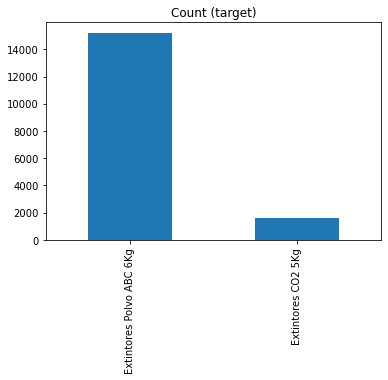

In [23]:
smo.tipo.value_counts().plot(kind='bar', title='Count (target)');

#### Importem llibreries

In [24]:
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score

#### Eliminem les dimensions temporals i canviem el tipus de camp a int64

In [25]:
#smo['tipo'].value_counts()
smo = smo.drop(['fe_al_det'], axis=1)
smo = smo.drop(['fe_al_man'], axis=1)
smo['id_serv2'] = smo['id_serv2'].astype(np.int64)
smo['id_vehi2'] = smo['id_vehi2'].astype(np.int64)
smo['any'] = smo['any'].astype(np.int64)

#### Agrupem dades per poder fer el SMOTE i construim la columna extabc que es un camp boolea per representar com a 1 'Extintores Polvo ABC 6Kg' , i com a 0 'Extintores CO2 5Kg'. Despres eliminem la columna 'tipo'.

In [26]:
smo2=smo.groupby(['tipo','mes','cp'])['id_man2'].count().reset_index()
smo2['extabc']=smo2['tipo'].str.contains('Extintores Polvo ABC 6Kg')
smo2 = smo2.drop(['tipo'], axis=1)


#### Visualitzem com han quedat les dades en una gràfica, i podem observar el desequilibri que tenim entre els dos valors

Text(0, 0.5, 'Tipo elemento')

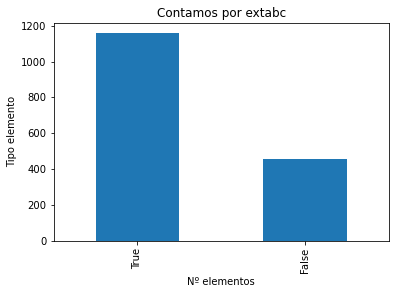

In [27]:
smo2.extabc.value_counts().plot(kind='bar', title='Contamos por extabc');
plt.xlabel('Nº elementos')
plt.ylabel('Tipo elemento')


#### Importem la llibreria SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

#### Dividim el conjunt de dades en característiques i etiquetes.

In [34]:
X = smo2.drop(['extabc'], axis=1)
X = X.drop(['cp'], axis=1)
#X.reset_index(drop=True, inplace=True)
y = smo2['extabc']
y=y.astype('int')
#X.dtypes


#### Apliquem el mètode SMOTE

In [35]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#### Visualitzem les dades processades en una gràfica

0    1157
1    1157
Name: extabc, dtype: int64

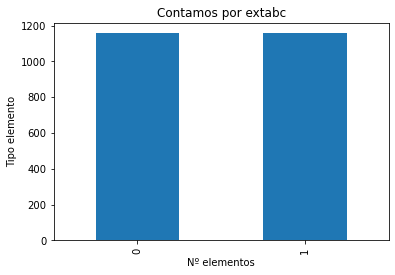

In [36]:
pd.value_counts(y).plot.bar()
plt.title('Contamos por extabc')
plt.xlabel('Nº elementos')
plt.ylabel('Tipo elemento')
y.value_counts()

#### Conclusió: Ha ampliat el nombre de valors de la columna minoritaria, sense reduir la columna majoritaria, aconseguint que no tinguem desequilibri entre les dos dades.

# Exercici 3

#### Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

#### Reservoir sampling es un algoritme aleatori que s'utiliza para seleccionar k elements de n mostres, on n es usualment molt gran o desconegut. 

#### Algotime

#### 1. Copia els primers k elements de l'array d'entrada al array de sortida
#### 2. Itera de k a n-1 (amb els dos inclosos). En cada iteració j:

#### 2.1 Generar un número aleatori entre 0 i j

#### 2.2 Sí el número es mes gran que k, substituim l'element amb index (aleatori) en l'array de sortida amb el item del array j de l'array d'entrada

#### Aquí deixo l'exemple amb un array petita

In [37]:
# Including dependancies
import random
# Defining the parameters
n = 8
k = 4
# The array to be sampled
input_array = [1, 7, 4, 8, 2, 6, 5, 9]
output = []
# Initializing the output array to the first k elements
# of the input array
for i in range(k):
  output.append(input_array[i])
# Iterating over k to n-1
for j in range(k,n):
  # Generating a random number
  index = random.randint(0, j)
  # Replacing an element in the  output with an element
  # in the input if the randomly generated number is less
  # than k.
  if index < k:
    output[index] = input_array[j]
print("Input array:")
print(input_array)
print("Output array:")
print(output)

Input array:
[1, 7, 4, 8, 2, 6, 5, 9]
Output array:
[1, 9, 4, 8]


#### Ara ho representem amb el meu dataframe. Agafem 500 registres (k) aleatoris del nostre DataFrame.

In [43]:
n=smo2['extabc'].count()
k=500
input_array = smo2.index.tolist()
f=[]
for i in range(k):
  f.append(input_array[i])
for j in range(k,n):
    index = random.randint(0, j)
    if index < k:
        f[index] = input_array[j]
smo4 = pd.DataFrame(index=smo2.index[f].values)

#### Revisem que el nou DataFrame tingui els 500 resultats que volem

In [44]:
len(smo4)

500

#### Links de interes per mi

https://www.educative.io/edpresso/what-is-reservoir-sampling
https://moonbooks.org/Articles/How-to-create-a-random-sample-with-a-reservoir-using-pandas-in-python-/
https://www.geeksforgeeks.org/reservoir-sampling/
https://medium.com/@er.archiejain/balance-the-imbalanced-datasets-smote-810c2f13ce16
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://www.python-graph-gallery.com/